In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling.profile_report import ProfileReport
##pandas_profiling会出现版本冲突，选择ydata_profiling

In [2]:
#8-1
df = pd.read_csv("github_bot_processed_data.csv")
pd.set_option('display.max_colwidth', 9)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
print(df)

       label  type  site_admin  company   blog  location  hireable       bio  \
0      Human  True     False      False  False     False     False       NaN   
1      Human  True     False      False   True     False      True  I jus...   
2      Human  True     False       True   True      True      True  Time ...   
3        Bot  True     False      False  False      True     False       NaN   
4      Human  True     False      False  False     False      True       NaN   
...      ...   ...       ...        ...    ...       ...       ...       ...   
19763    Bot  True     False       True   True      True     False  Tony ...   
19764  Human  True     False      False  False     False     False       NaN   
19765  Human  True     False       True  False      True     False  Softw...   
19766  Human  True     False       True  False     False     False       NaN   
19767    Bot  True     False      False  False      True     False       NaN   

       public_repos  public_gists  foll

In [3]:
#8-2
pd.set_option('display.max_colwidth', None)
df.head(5)#给出前5行的数据

label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                             bio  \
0                                                            NaN   
1  I just press the buttons randomly, and the program evolves...   
2                     Time is unimportant,\nonly life important.   
3                                                            NaN   
4                                                            NaN   

   public_repos  public_gists  followers  following  \
0            26             1          5          1   
1            30             3          9          6   
2           103            49       1212        221   
3            49             0         84          2   
4            11             1          6          2   

                  created_at                 updated_at  text_bot_count  
0  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0  
1  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0  
2  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0  
3  2014-05-20 18:43:09+00:00  2023-10-12 12:54:59+00:00               0  
4  2012-08-16 14:19:13+00:00  2023-10-06 11:58:41+00:00               0

In [4]:
df.info()#给出列的信息，包括非空元素个数，元素类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB


In [5]:
df.describe()

public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000

In [6]:
#8-3
df.columns
print("The old date:")
print(df[["created_at","updated_at"]])
df["created_at"] = pd.to_datetime(df["created_at"])
df["updated_at"] = pd.to_datetime(df["updated_at"])
print("The new date:")
print(df[["created_at","updated_at"]])


The old date:
                      created_at                 updated_at
0      2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00
1      2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00
2      2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00
3      2014-05-20 18:43:09+00:00  2023-10-12 12:54:59+00:00
4      2012-08-16 14:19:13+00:00  2023-10-06 11:58:41+00:00
...                          ...                        ...
19763  2014-07-02 23:27:34+00:00  2023-08-15 16:38:34+00:00
19764  2017-12-06 21:56:31+00:00  2023-07-26 18:32:25+00:00
19765  2015-11-14 14:44:05+00:00  2022-08-23 21:09:49+00:00
19766  2021-11-23 18:55:29+00:00  2023-10-06 22:50:45+00:00
19767  2016-04-22 22:11:59+00:00  2022-07-07 19:48:21+00:00

[19768 rows x 2 columns]
The new date:
                     created_at                updated_at
0     2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1     2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2     2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+

In [7]:
#8-4
df_log = pd.DataFrame(np.log(df['public_repos'] + 1))
df_log.columns = ["log_public_repos"]
df_log["log_public_gists"] = np.log(df['public_gists'] + 1)
df_log['log_followers'] = np.log(df['followers'] + 1)
df_log['log_following'] = np.log(df['following'] + 1)#加一防止取0
df_log.describe()
#与上面相比，数据整体变小，易于统计，在数据分布范围过广时，用对数变换可以减小极端值的影响

log_public_repos  log_public_gists  log_followers  log_following
count      19768.000000      19768.000000   19768.000000   19768.000000
mean           3.393445          1.366791       3.502516       1.858959
std            1.480122          1.493788       1.955763       1.743082
min            0.000000          0.000000       0.000000       0.000000
25%            2.484907          0.000000       2.079442       0.000000
50%            3.583519          1.098612       3.526361       1.609438
75%            4.430817          2.397895       4.836282       3.135494
max           10.819798         10.929207      11.469527      10.231928

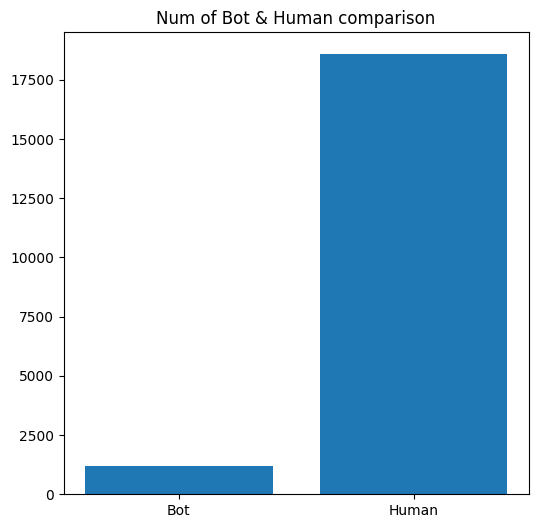

In [8]:
#条形图
num_bot = (df["label"] == "Bot").sum()
num_human = (df["label"] == "Human").sum()

plt.figure(figsize=(6,6))
plt.bar(["Bot","Human"],[num_bot,num_human])
plt.title("Num of Bot & Human comparison")
plt.show()

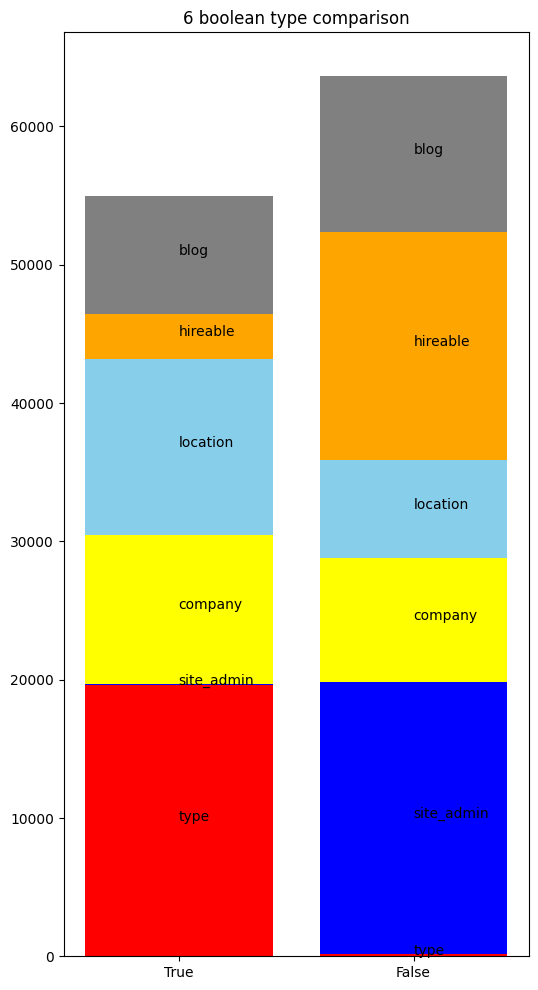

In [9]:
#堆积柱状图
#计算偏移量所用变量
t_offest = 0
f_offest = 0
i = 0

# 绘出子块函数：
def get_list_tf(sr):
    global t_offest
    global f_offest
    global i
    list_color = ["red","blue","yellow","skyblue","orange","gray"]
    list_name = ["type",
        "site_admin",
        "company",
        "location",
        "hireable",
        "blog"]
    t = sr.sum()
    f = len(sr) - t
    ret = [t+t_offest,f+f_offest]
    plt.bar(x = ["True"],height = t,bottom= t_offest,color = list_color[i])
    plt.bar(x = ["False"],height = f,bottom= f_offest , color = list_color[i])
    plt.text(x= ["True"], y= t/2 + t_offest , s=list_name[i])
    plt.text(x= ["False"], y= f/2 + f_offest , s=list_name[i])
    t_offest+=t
    f_offest+=f
    i+=1

plt.figure(figsize=(6, 12))
#绘制子块
get_list_tf(df["type"])
get_list_tf(df["site_admin"])
get_list_tf(df["company"])
get_list_tf(df["location"])
get_list_tf(df["hireable"])
get_list_tf(df["blog"])

plt.title("6 boolean type comparison")
plt.show()

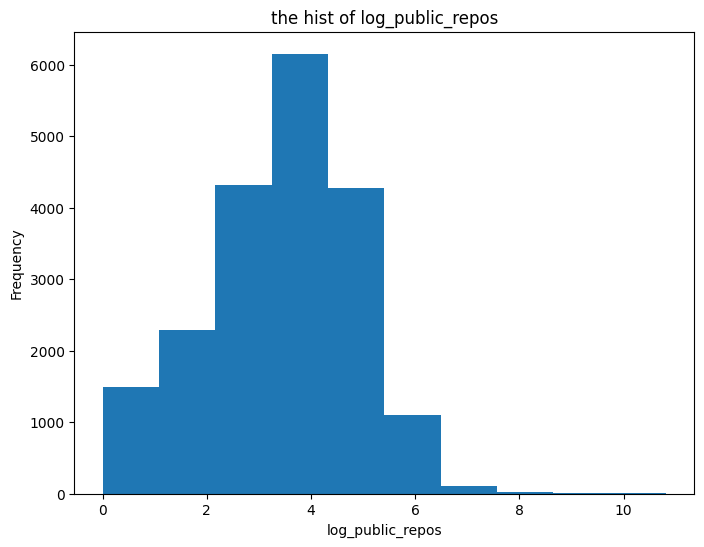

In [10]:
#直方图
plt.figure(figsize=(8,6))
plt.hist(df_log["log_public_repos"])
plt.title("the hist of log_public_repos")
plt.ylabel("Frequency")
plt.xlabel("log_public_repos")
plt.show()

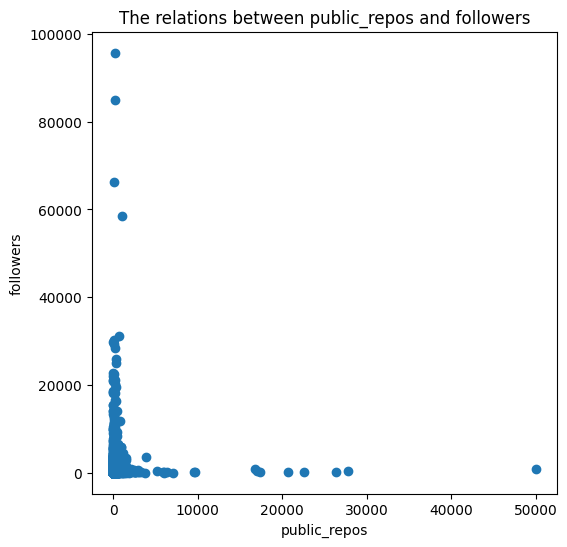

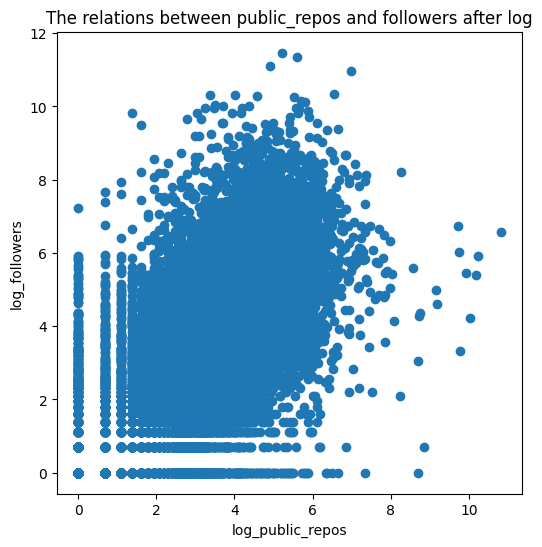

In [11]:
#散点图
plt.figure(figsize=(6,6))
plt.scatter(x=df["public_repos"],y=df["followers"])
plt.ylabel("followers")
plt.xlabel("public_repos")
plt.title("The relations between public_repos and followers")
plt.show()
#
plt.figure(figsize=(6,6))
plt.scatter(x=df_log["log_public_repos"],y=df_log["log_followers"])
plt.ylabel("log_followers")
plt.xlabel("log_public_repos")
plt.title("The relations between public_repos and followers after log")
plt.show()

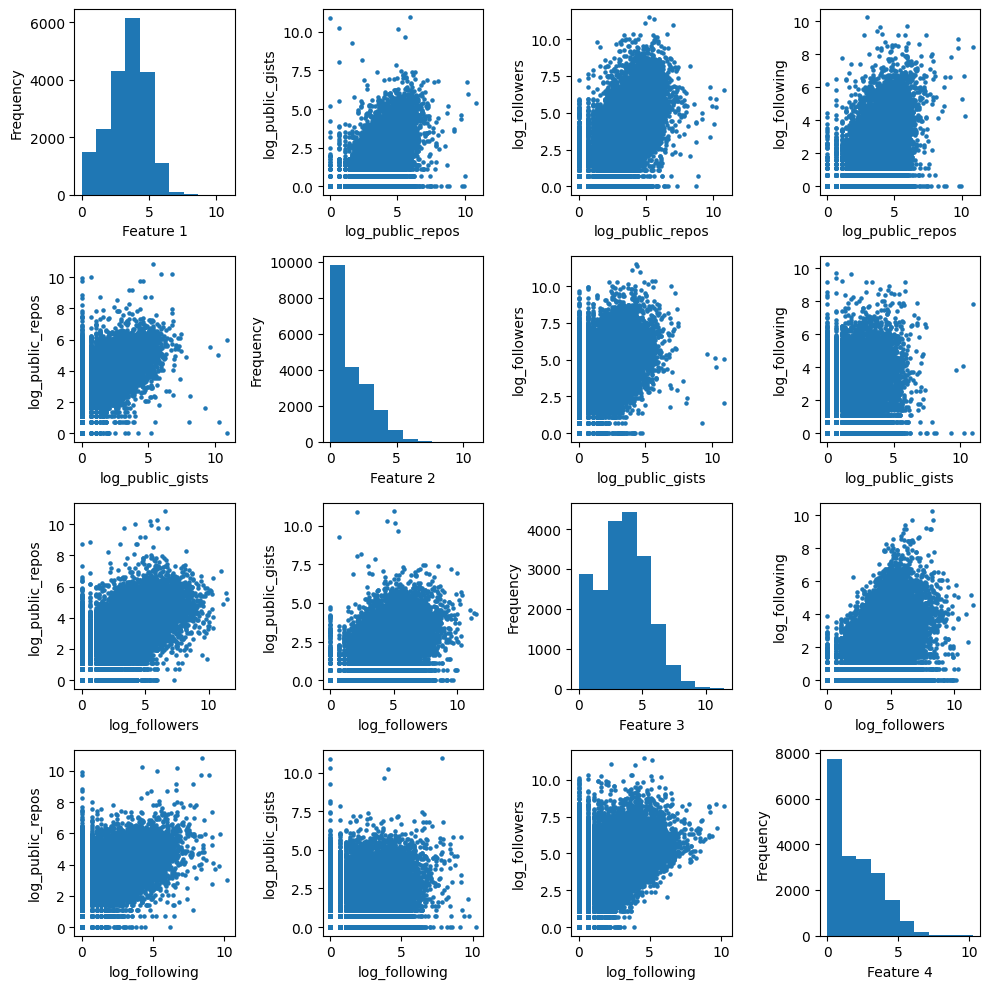

In [12]:
#对取log后数据做散点矩阵
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
Feature = list(df_log.columns)
for i in range(4):
    for j in range(4):
        if i != j:
            axes[i, j].scatter(df_log.iloc[:, i], df_log.iloc[:, j], s= 5)
            axes[i, j].set_xlabel('{}'.format(Feature[i]))
            axes[i, j].set_ylabel('{}'.format(Feature[j]))
        else:
            axes[i, j].hist(df_log.iloc[:,i], bins=10)
            axes[i, j].set_xlabel(f'Feature {i+1}')
            axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


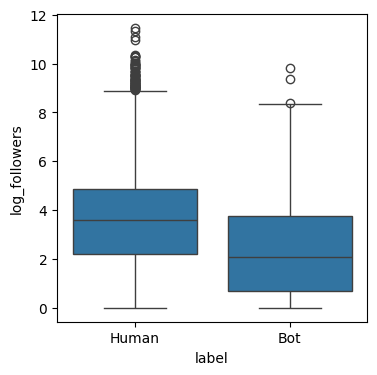

In [13]:
##8-6
# 绘制箱线图
plt.figure(figsize=(4,4))
df_log["label"] = df["label"]
sns.boxplot(x="label", y="log_followers", data=df_log)
plt.show()

<Figure size 800x600 with 0 Axes>

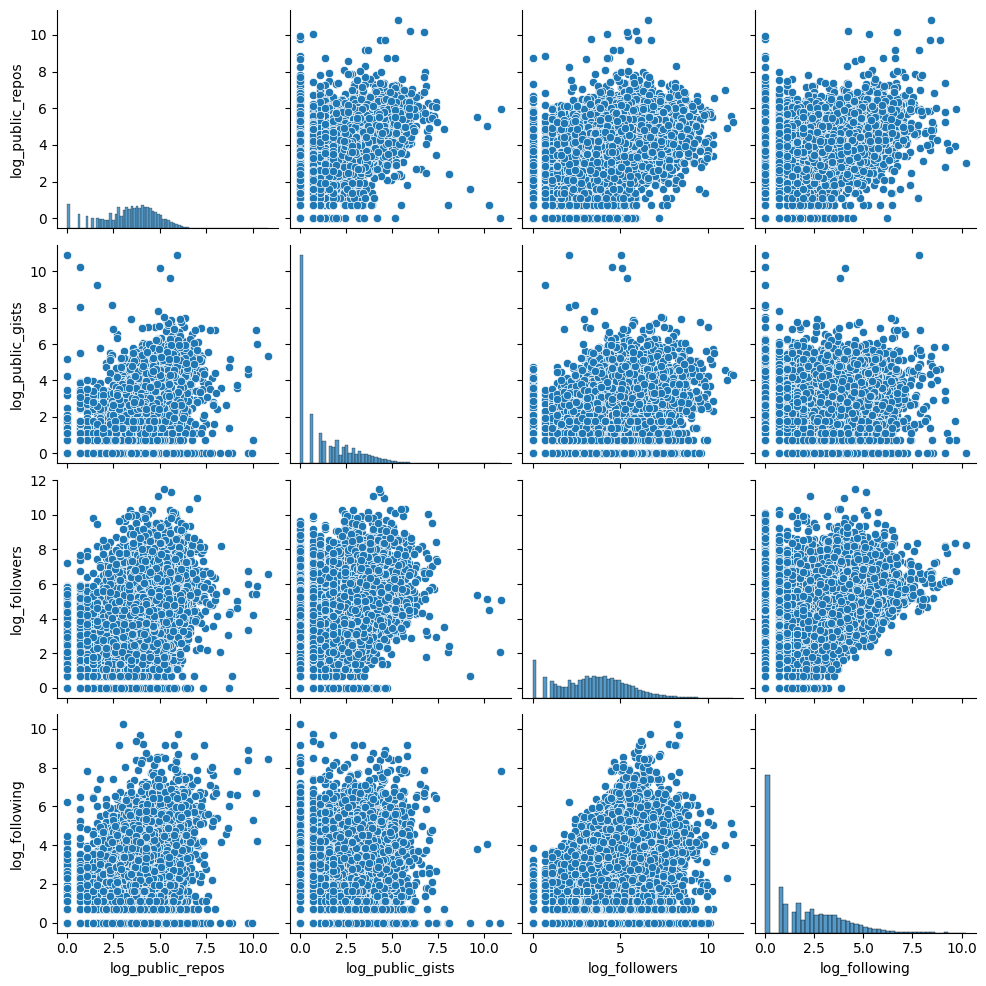

In [14]:
#绘制成对图
correlation = df_log.loc[:,"log_public_repos":"log_following"]
plt.figure(figsize=(8,6))
sns.pairplot(correlation)
plt.show()

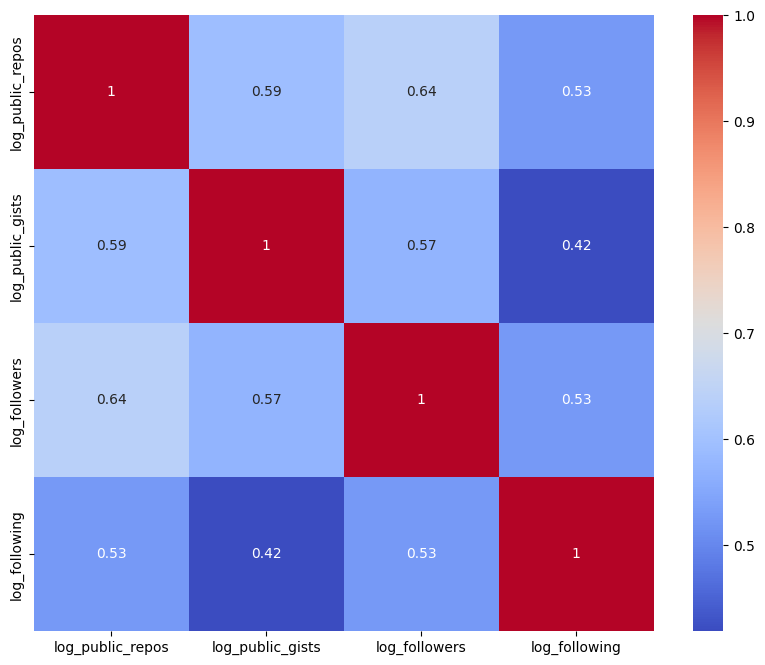

In [15]:
#绘制热图
plt.figure(figsize=(10,8))
correlation = correlation.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

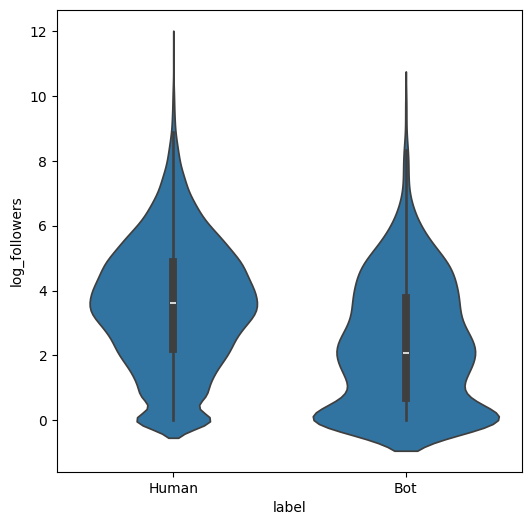

In [16]:
#绘制小提琴图
plt.figure(figsize=(6,6))
sns.violinplot(x="label", y="log_followers",data=df_log)
plt.show()

In [17]:
#8-7
profile = ProfileReport(df,title = "Report based on Github users",explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]